In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Schrodinger(object):
    
    def __init__(self, V, start=-1, end=1, npts=100, mass=1.0):
        self.m = mass
        self.n = npts
        self.x = np.linspace(start,end,npts)
        self.dx = abs(self.x[1]-self.x[0])
        self.__init_laplacian__()
        
        self.Vx = V(self.x)        
        self.H = (-0.5/self.m)*self.laplace + np.diag(self.Vx)
        self.E = np.array([])
        self.psi = []
    
    def __init_laplacian__(self):
        M = -2*np.identity(self.n,'d')
        for i in xrange(1,self.n):
            M[i,i-1] = M[i-1,i] = 1
        self.laplace = M / self.dx**2
        
    def diagonalize(self):
        E,U = np.linalg.eigh(self.H)
        psi = []
        for i, e in enumerate(E):
            psi.append(U[:,i]/np.sqrt(self.dx) + e)
        self.E = E
        self.psi = psi
    
    def plot_spectra(self,levels=3):
        if not self.psi: return
        plt.plot(self.x, self.Vx ,color='k')
        for i in xrange(0,levels):
            plt.axhline(y=self.E[i],color='k',ls=":")
            plt.plot(self.x,self.psi[i])
        plt.title("Spectra and Eigenfunctions")
        plt.xlabel("Position")
        plt.ylabel("Energy")
        
    def wavefunction(self, s, f = lambda x : np.exp(- 100 * (x-1)**2)):
        self.s = s
        self.f = f
        dt = s.dx
        now = f(s.x)
        while True:
            return now
            now = now - dt*(1j)*s.H*now
            
    def wave_to_prob(self):
        self.a = a
        self.p = p
        a = np.array([])
        p = np.conjugate(a) * a
        return p / p.sum()
    
    def plot_prob(s, w):
        wave_to_prob(w)

In [2]:
s = Schrodinger(lambda x : 160*x**2)

In [3]:
s.diagonalize()

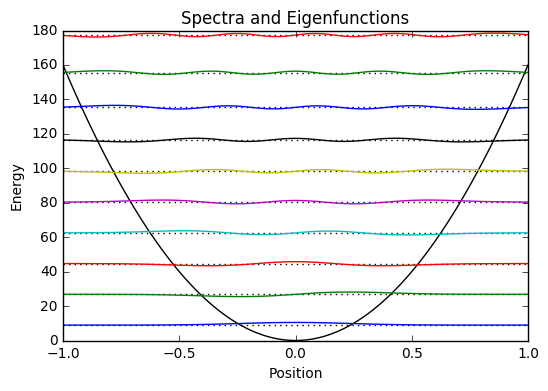

In [4]:
s.plot_spectra(10)

In [5]:
s = Schrodinger(lambda x : -40*np.cos(5*x))

In [6]:
s.diagonalize()

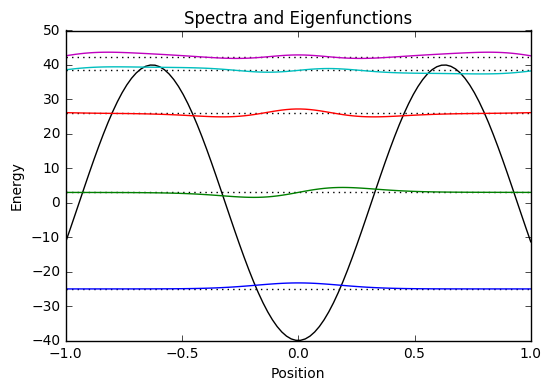

In [7]:
s.plot_spectra(5)